
# DESC SN Ia metric # 



In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import pandas as pd

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline

In [3]:
# Baseline Survey
baseline_file = get_baseline()
opsdb = maf.db.OpsimDatabase(baseline_file)
runName = os.path.split(baseline_file)[-1].replace('.db', '')

print(runName)

baseline_v2.0_10yrs


In [4]:
# Set up output
outDir = 'sn'
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [7]:
#  Set up to time it at one point in the sky

plotDict = {'percentileClip': 95., 'nTicks': 5}

sne_nside = 16
sn_summary = [maf.MedianMetric(), maf.MeanMetric(),
              maf.SumMetric(metricName='Total detected'),
              maf.CountMetric(metricName='Total on sky', maskVal=0)]
slicer = maf.HealpixSlicer(nside=sne_nside, useCache=False)
metric = maf.SNNSNMetric(verbose=False)  
bundle = maf.MetricBundle(metric, slicer, None, plotDict=plotDict, 
                        summaryMetrics=sn_summary)


bg = maf.MetricBundleGroup({'sn': bundle}, opsdb, outDir, resultsDb)


# Behind the scenes stuff to get the simulated data and set up the slicer so we can test ONE point
bg.setCurrent('')
bg.getData('')
simData = bg.simData
bundle.slicer.setupSlicer(simData)

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 54522 699 78
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 63609 699 91
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/lynnej/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading  /Users

In [6]:
lenvisits = []
for s in bundle.slicer:
    lenvisits.append(len(s['idxs']))
lenvisits = np.array(lenvisits)
x = np.where(lenvisits == np.max(lenvisits))[0][0]

bundle.slicer[x]

{'idxs': array([396671, 396646, 396647, ..., 261839, 185708,  55903]),
 'slicePoint': {'sid': 660,
  'ra': 1.009797638653862,
  'dec': -0.8402225818983444,
  'nside': 8}}

In [7]:
%%timeit 

metric.run(simData[bundle.slicer[x]['idxs']], bundle.slicer[x]['slicePoint'])

4.07 s ± 177 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
print(len(slicer) * 4.07/2/60/60, 'hrs best guess metric run time')

1.7365333333333335 hrs best guess metric run time


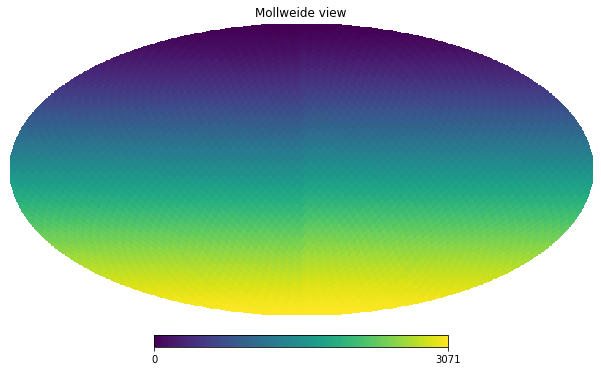

In [10]:
hp.mollview(slicer.slicePoints['sid'])

Querying database observations with no constraint for columns ['fiveSigmaDepth', 'visitExposureTime', 'visitTime', 'night', 'filter', 'observationId', 'fieldRA', 'fieldDec', 'observationStartMJD', 'numExposures', 'rotSkyPos'].
Found 2086980 visits
Running:  ['sn']


/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:25: UserWarning: Slicer value of nside 16 different from map value 128, using slicer value
  warnings.warn(f"Slicer value of nside {slicePoints['nside']} different "


Completed metric generation.
Running reduce methods.


/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')
0.0 180.0 -180.0 180.0


Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 211 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
0.0 180.0 -180.0 180.0


Plotting complete.


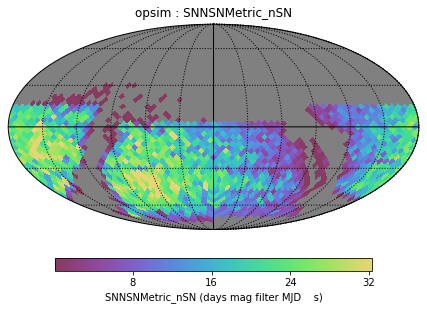

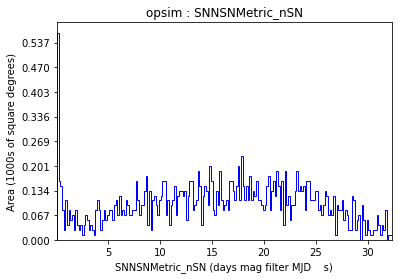

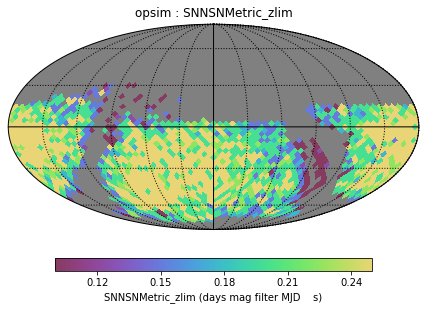

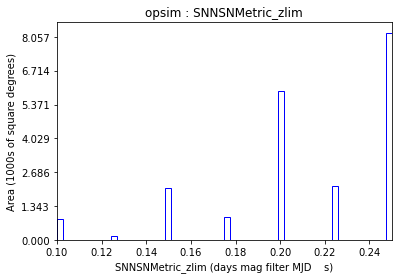

In [11]:
bg.runAll()        
bg.plotAll(closefigs=False)

In [15]:
bundle.metricValues.compressed()[0]

array([(749, 1.3253594, 0.52359878, 16, 0.52899021, 0.018, 0.1, 69)],
      dtype=[('sid', '<i8'), ('ra', '<f8'), ('dec', '<f8'), ('nside', '<i8'), ('ebv', '<f8'), ('nSN', '<f8'), ('zlim', '<f8'), ('healpixID', '<i8')])

In [16]:
# The 'reduce' values of the metric got stored in the bundle dict in the bungle group 
# (which is why we usually set this as a dictionary outside of the metricBundleGroup call .. whoops.
bg.bundleDict

{'sn': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x1a5842d30>,
 'SNNSNMetric_nSN': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x1d83331f0>,
 'SNNSNMetric_zlim': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x1a7836400>}

In [17]:
# The nSN and zlim values are pulled out in those reduce methods, into their own bundles.
bdict = bg.bundleDict
bdict['SNNSNMetric_nSN'].metricValues.compressed()[0]

0.018

In [20]:
bdict['SNNSNMetric_zlim'].metricValues.compressed()[0]

0.1